Ejemplo --- Aproximación y entrenamiento de modelos de redes neuronales
===

* *60 min* | Última modificación: Junio 22, 2019.

## Definición del problema

Se desea construir un modelo de regresión no lineal para la siguiente muestra de 31 observaciones de $(x, y)$. Se requiere que el modelo aproxime con error **cero** los datos.

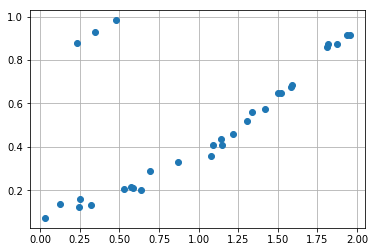

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [1.8131, 0.0318, 1.5181, 0.2522, 0.2440, 1.4175, 
     1.9538, 1.1506, 1.5042, 1.0798, 1.0915, 0.3173, 
     1.8157, 1.3352, 1.1399, 0.1276, 0.6909, 0.6331, 
     0.8671, 0.5867, 1.9373, 1.5842, 0.5707, 0.5285, 
     1.8708, 1.5870, 1.3027, 1.2181, 0.2318, 0.3471, 
     0.4763]

d = [5.1568, 0.4351, 3.8980, 0.9654, 0.7383, 3.4500, 
     5.4851, 2.4401, 3.8941, 2.1366, 2.4431, 0.8058, 
     5.2531, 3.3671, 2.6199, 0.8230, 1.7403, 1.2172, 
     1.9868, 1.2564, 5.4922, 4.0645, 1.2978, 1.2245, 
     5.2532, 4.1206, 3.1076, 2.7601, 5.2678, 5.5783, 
     5.8991]

d = [u / 6.0 for u in d]

plt.plot(x, d, 'o')
plt.grid()

## Definición del problema en términos de los datos

Se desea construir un modelo no lineal que relacione las variables $x$ y $y$. De acuerdo con la teoría matemática, una combinación de funciones sigmoidales puede aproximar con precisión arbitraria cualquier conjunto de datos definido en un dominio compacto. Esto es, un perceptrón multicapa puede memorizar cualquier conjunto de datos si tiene un número suficiente de neuronas en la capa oculta.

## Metodología 

### Teoría Matemática

Se tiene un modelo $m$ con $n$ entradas y $H$ neuronas en la capa oculta. El modelo $m$ tiene un error de entrenamiento $E$. 

* Es posible construir de forma trivial un modelo $m^*$ con las mismas $n$ entradas y $H+1$ neuronas en la capa oculta, el cual tiene el mismo error de entrenamiento $E$. Para ello, solo es necesario mantener los mismos pesos del modelo $m$ y asignar el valor de cero a los pesos de entrada y salida de la neurona oculta $H+1$.

* Es posible construir de forma trivial un modelo $m^{**}$ con $n+1$ entradas y las mismas $H$ neuronas en la capa oculta, el cual tiene el mismo error de entrenamiento $E$ del modelo $m$. Para ello, solo es necesario agregar la entrada $n+1$ al modelo $m$, manteniendo los valores de los pesos actuales y asignando cero a las conexiones que salen de la entrada $n+1$.

Esto quiere decir que si el error de los modelos $m^*$ o $m^{**}$ es mayor que el error $E$, el modelo fue mal entrenado

### Simulación numerica

Analice el gráfico de la cantidad de neuronas en la capa oculta versus el error de entrenamiento.

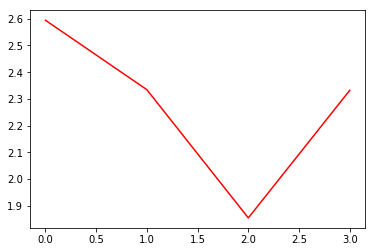

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

history_sse = []

for h in range(1, 5):

    ## crea el modelo vacio
    model = tf.keras.Sequential()

    ## capa oculta
    model.add(tf.keras.layers.Dense(h,                         # neuronas en la capa oculta   
                                    activation=tf.nn.sigmoid,  # función de activación
                                    input_shape = (1,)))       # una neurona de entrada

    ## capa de salida
    model.add(tf.keras.layers.Dense(1,                         # una neurona de salida
                                    activation=tf.nn.sigmoid)) # capa de salida

    ## optimizacion usando gradiente
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

    ## crea el modelo
    model.compile(optimizer=optimizer,     # optimizador
                  loss='mse',              # función a minimizar
                  metrics=['mse'])  # metricas a reportar

    ## entrena el modelo y guarda 
    ## el reporte de entrenamiento
    model.fit(x, d, epochs=10000, verbose=0)

    ## error de entrenamiento
    y = [u[0] for u in model.predict(x).tolist()]
    sse = np.sum(np.square(np.array(y) - np.array(d)))
    history_sse.append(sse)

plt.plot(history_sse, '-r');

¿Por qué la disminución del SSE no es continua?

**Actividad.--** Es posible modificar el código anterior para obtener mejores puntos de óptima?

### Razones por las cuales es dificil entrenar una red neuronal tipo perceptrón multicapa

* **Regiones planas en la función de error**. Para las funciones de activación tipo sigmoideas, en las cuales hay valores de salida constante, el gradiente es cero, generando supereficies planas en la función de error (el error no cambia con variaciones en los pesos de las conexiones de entrada a la neurona).

* **Multiplicidad de puntos de óptima**. Una nueva red neuoronal puede obtenerse al intercambiar dos neuronas en la capa oculta con sus respectivos pesos. Es decir, es la misma red con las conexiones ordenadas de forma diferente.